# 1. Running Holefill.py

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


First copy the contents of assign_Notebook into the project directory. In order to run the Holefill.py from Jupyter notebook, execute the command below. It will print two figures inline: one containing the original image and the other showing the region to be filled and the texture region. You will be asked, "Are you happy with this choice of fillRegion and textureIm?". You should type "Yes" to proceeed. Finally, the script will print a figure of the image with the texture filled in. As this skeleton program is missing some critical routines, the texture will initially be filled in as all black.

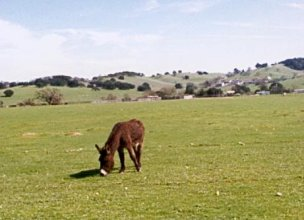

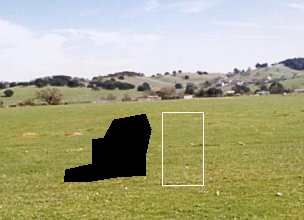

Are you happy with this choice of fillRegion and textureIm?
Yes or No: Yes
Number of pixels remaining =  3473
Number of pixels remaining =  1046


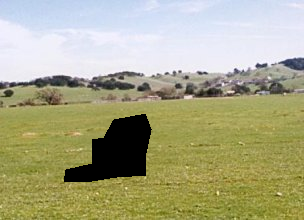

In [13]:
%run Holefill.py

# 2. Modify Holefill.py

You need to modify the `ComputeSSD` function in `Holefill.py`, whose purpose is to compute the sum squared difference (SSD) between an image patch and the texture image for each possible location of the patch within the texture image.  This function must ignore empty pixels that have a value of `1` in the given mask image. <u>Please follow the hints provided on the assignment webpage for the complete instructions.</u>

 For next part, you need to modify the function `CopyPatch` in the 'Holefill.py' that takes the SSD image created above and chooses randomly amongst the best matching patches to decide which patch to paste into the texture image at that point. Remember again that you should only copy pixel values into the hole section of the image. Existing pixel values should not be overwritten. Skeleton code for `CopyPatch` is provided in `Holefill.py`, along with comments explaining the arguments.

 Try running the 'Holefill.py' again with the modified code to see if hole-filling part is correctly implemented.

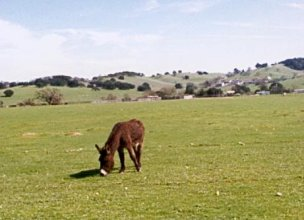

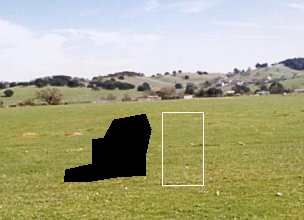

Are you happy with this choice of fillRegion and textureIm?
Number of pixels remaining =  3473
Number of pixels remaining =  997
Number of pixels remaining =  57


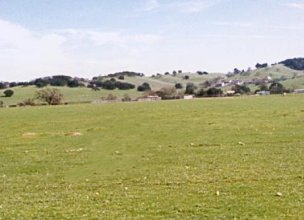

In [18]:
%run Holefill.py

# 3. Custom fill and texture Regions

Now, you can select your own regions to fill or texture selection by running the polyselect.py function. To make interactive inline operations compatible with jupyter notebook, you need to first install `ipympl` using `pip install ipympl`. Then you need to enable the inline interactive operation by `%matplotlib ipympl` Finally execute the `polyselect.py` file using `%run polyselect.py`.

In [23]:
pip install matplotlib==3.8.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 73.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [1]:
pip install ipympl

In [1]:
%matplotlib ipympl

Now run the polyselect.py file. To draw a polygon you need to select each successive vertex with a  left-click. Simply right-click anywhere in the image to save the polygon. When you run the 'polyselect.py' file you will be prompted whether you want to draw polygon for fill region (type '0') or texture region (type '1'). Depending on what you choose the polyon will be saved in either 'fill_region.pkl' or 'texture_region.pkl' To run the polyselect execute the following:

Would you like to select the region to be filled (0) or the sample texture region (1)?
0 or 1: 1
Note: Code in Holefill.py forces the texture region to be rectangular
Please use your mouse to specify the region that you want for texture_region.pkl
(Left-click to select each polygon vertex. Right-click to finalize and save the polygon.)


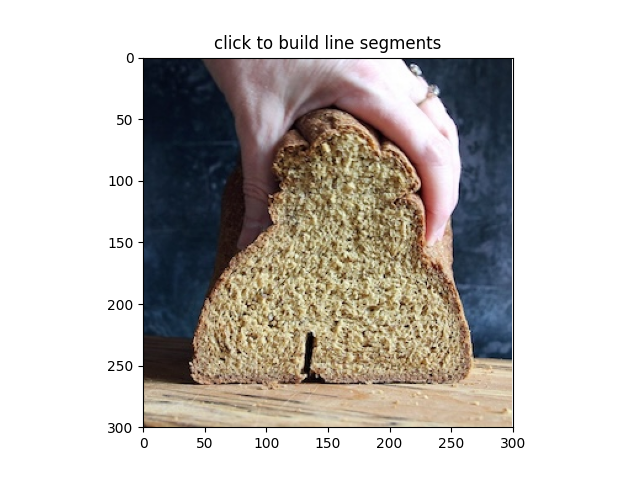

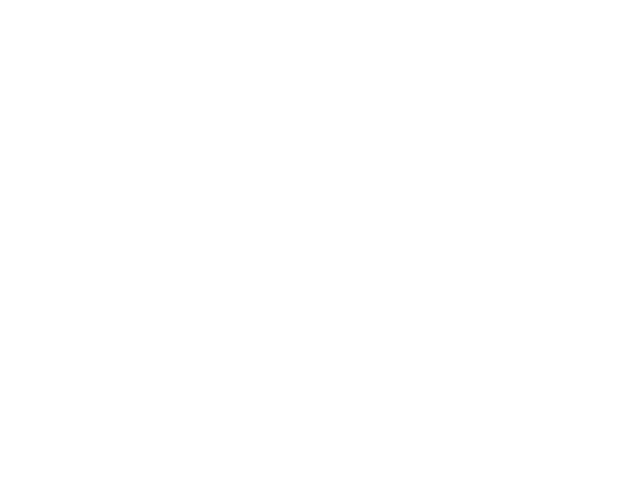

Saved region to texture_region.pkl!


In [51]:
%run polyselect.py

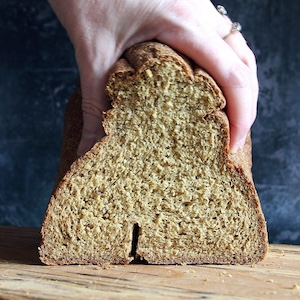

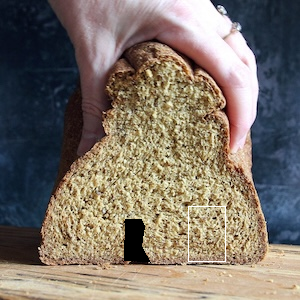

Are you happy with this choice of fillRegion and textureIm?
Number of pixels remaining =  850
Number of pixels remaining =  6


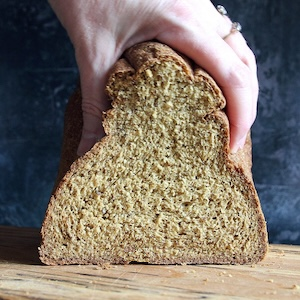

In [60]:
%run Holefill.py
# For bread.jpg,
# combinations of patchL = 3, 5, 10 and
# randomPatchSD = 0, 0.1, 0.5, 1 , 10 are used,
# all generated similar GOOD results:

# The texton is quite uniform here, allowing the method to effectively match patches with similar pixel values, shapes, and textures within the textureRegion. There are no significant color or brightness gradients, which allows for seamless patch blending into the hole.


Would you like to select the region to be filled (0) or the sample texture region (1)?
0 or 1: 1
Note: Code in Holefill.py forces the texture region to be rectangular
Please use your mouse to specify the region that you want for texture_region.pkl
(Left-click to select each polygon vertex. Right-click to finalize and save the polygon.)


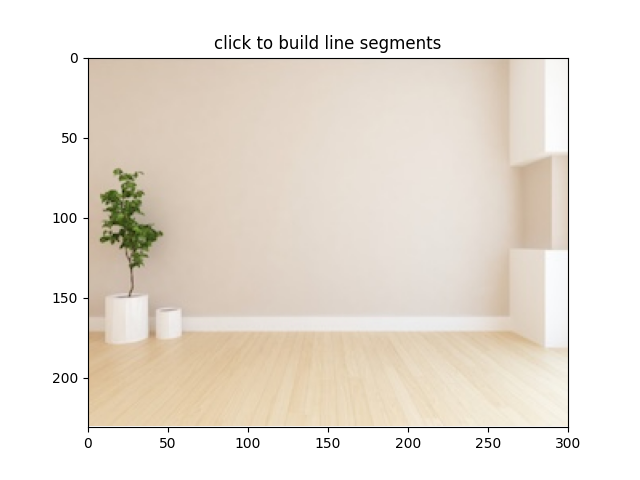

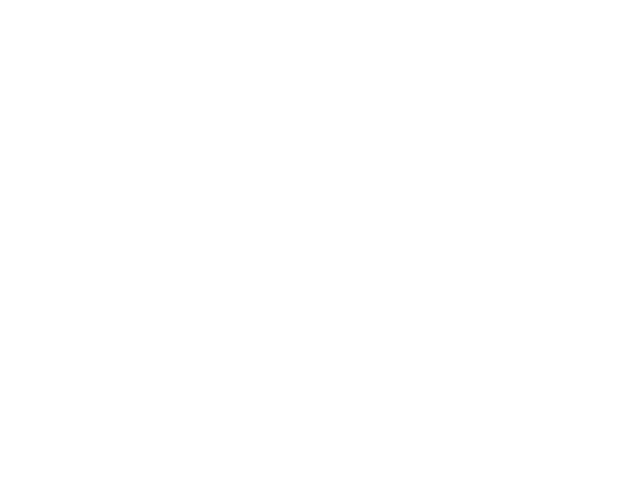

Saved region to texture_region.pkl!


In [39]:
%run polyselect.py

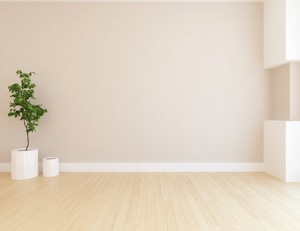

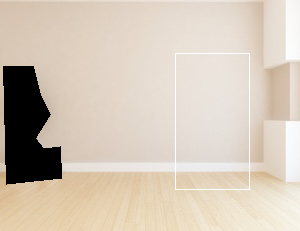

Are you happy with this choice of fillRegion and textureIm?
Number of pixels remaining =  4959
Number of pixels remaining =  3629
Number of pixels remaining =  2466
Number of pixels remaining =  1429
Number of pixels remaining =  475
Number of pixels remaining =  46


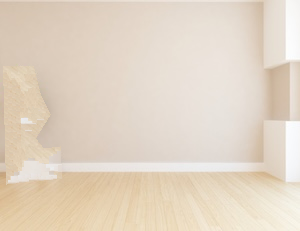

In [57]:
%run Holefill.py
# patchL = 2, 3 used for plantWall.jpg
# randomPatchSD = 0, 0.1, 0.5, 1 , 10 are used,
# all generated similar BAD results:


- *Briefly describe why the method failed in the case in which it performed poorly?*

The method failed in this case because SSD matching looks at raw pixel differences without considering contextual information like lighting or overall composition, thus couldn't properly account for the background wall's brightness gradient and the flooring's perspective lines with varying shades. Also since the algorithm begins at the edges and works inward, patches that align with one section of the rim may not match other parts, creating visible color, tones and brightness gaps when the sections are combined.

#### 1. (6 points) Provide an explanation for the effects of the `randomPatchSD` and `patchL` parameters. What results can be expected if these values are too small or too large, and why do these results happen?


- The `randomPatchSD` parameter determines the level of randomness in selection of best matching patch. If it's too small, it could cause repetitive or uniform textures. If it's too large, the selection becomes too random, which could result in poor matches and visible artifacts or abrupt edge transitions that causes inconsistency of texture in image.
- The `patchL` determines the half-length of the square patch used for matching. When it is too small, the patches capture less texture detail, resulting in a pixelated or overly simplistic fill that may not blend well with the surrounding texture. If it is too large, the algorithm may have difficulty finding appropriate patches, as it includes samples from farther away in the SSD calculation, which can lead to noisy or inconsistent results, causing mismatches and visible artifacts in the image.
